# COVID-19 Analysis

Author: Nathan Nusaputra

## EDA

In [6]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
# read csv data for covid and income
covid_data = pd.read_csv(r"/Users/nathannusaputra/Berkeley/COVID19_Project/Data_Raw/us-counties.csv")
income_data = pd.read_csv(r"/Users/nathannusaputra/Berkeley/COVID19_Project/Data_Raw/Kaggle_USHousehold_Income/kaggle_income.csv", encoding='latin-1')


In [8]:
# check the first couple of rows of covid data
covid_data.head() 


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


The covid data starts on January 21 with one case in Washington. Each day COVID progresses, the data just adds to the total for the overall state.

In [9]:
income_data.head()


,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [10]:
covid_data.describe()

,id,State_Code,Zip_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
count,3.252600e+04,32526.000000,32526.000000,3.252600e+04,3.252600e+04,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000
mean,6.203707e+07,28.624885,50182.648404,1.165893e+08,6.952054e+06,37.731983,-91.303844,66703.986042,85452.938818,47273.695321,576.910273
std,1.115546e+08,16.297205,29410.122808,1.280894e+09,2.092093e+08,5.579450,16.227588,30451.194599,87810.895132,16555.486882,3911.006939
min,1.026000e+03,1.000000,601.000000,0.000000e+00,0.000000e+00,17.929085,-175.860041,0.000000,0.000000,0.000000,0.000000
25%,8.021282e+06,13.000000,26362.000000,1.906991e+06,0.000000e+00,34.013469,-97.664034,46015.500000,36046.250000,36075.000000,201.436458
50%,2.901168e+07,29.000000,48163.000000,5.022976e+06,2.703350e+04,38.925588,-87.139280,60738.000000,51874.500000,46179.000000,329.482618
75%,4.802899e+07,42.000000,76712.000000,3.090984e+07,5.082078e+05,41.495793,-79.852969,82223.500000,80915.000000,58078.000000,590.227670
max,4.802211e+08,72.000000,99950.000000,9.163267e+10,2.453228e+10,71.253500,-65.500823,242857.000000,300000.000000,113936.000000,612241.922964


In [ ]:
income_data.describe()

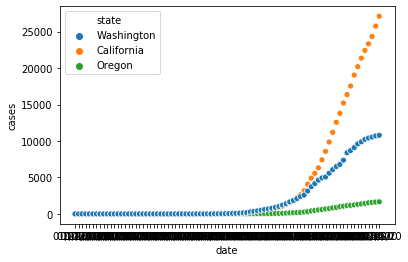

In [20]:

# clean data
covid_data["date"] = pd.to_datetime(covid_data["date"])
covid_data["date"] = covid_data["date"].dt.strftime('%m/%d/%y')


# group by state
states_data = covid_data.groupby(['date','state'], as_index=False).agg('sum').drop(columns=['fips'])
west_coast = states_data[states_data.state.isin(["Washington","Oregon","California"])]

states_data[states_data.date=='04/01/20']
ax = sns.scatterplot(x="date", y="cases",hue="state", data=west_coast)


In [21]:
# average income data
income_data[income_data.City=='Snohomish']

income_county_df = income_data.groupby(['State_Name', 'State_ab', 'County'], as_index=False).agg('mean').drop(columns=['ALand', 'Zip_Code', 'AWater', 'Lat', 'Lon', 'Median', 'Stdev', 'sum_w'])

income_city_df = income_data.groupby(['State_Name', 'State_ab', 'City'], as_index=False).agg('mean').drop(columns=['ALand', 'Zip_Code', 'AWater', 'Lat', 'Lon', 'Median', 'Stdev', 'sum_w'])

# add "County" to end of county name in covid dataframe
covid_data['County_upd'] = covid_data.county+" County"

# join based on new County column
final_df = covid_data.merge(income_county_df, how='left', left_on=['County_upd','state'], right_on=['County', 'State_Name'])
final_df = final_df.drop(columns=[ 'County','id', 'State_Code', 'fips'])

# join based on city and county as I have noticed that SF is not a county
final_df2 = final_df.merge(income_city_df, how='left', left_on=['county','state'], right_on=['City', 'State_Name'])

# if mean is null fill it with the other mean and same with state abbreviations
final_df2['Mean_x'] = final_df2.apply(lambda row: row['Mean_y'] if np.isnan(row['Mean_x']) else row['Mean_x'], axis=1)
final_df2['State_ab_x'] = final_df2.apply(lambda row: row['State_ab_y'] if pd.isnull(row['State_ab_x']) else row['State_ab_x'], axis=1)

# drop unnecessary columns
final_df2 = final_df2.drop(columns = ['State_ab_y', 'Mean_y', 'State_Name_x', 'City', 'id', 'State_Code', 'State_Name_y'])

final_df2.head()

# change name of column
final_df2.rename(columns={'Mean_x' :'mean_income'}, inplace=True)

# final_df[final_df.date=='04/01/20']

61971

In [27]:
# find list of counties and state that are not included to show where bias of data starts
missing_data_df = final_df2[final_df2['State_ab_x'].isnull()]
len(missing_data_df)

# create final dataframe for unique counties and states that are missing to show where data may be skewed
missing_data_df = missing_data_df.groupby(['state'], as_index=False).agg('sum')
missing_data_df.head()

,state,cases,deaths,mean_income
0,Alabama,7011,131,0.0
1,Alaska,2184,23,0.0
2,Arizona,83,51,0.0
3,Arkansas,6543,93,0.0
4,California,2928,122,0.0


In [14]:
# drop all the nulls
final_df3 = final_df2.dropna()
len(final_df3)

39656

In [15]:
final_df3.head()

final_df3.date.max()

# filter just for the latest date
max_date = final_df3[final_df3.date=='04/15/20']

## Analysis

Text(0.5, 1.0, 'Cases vs Deaths on 4/15/2020')

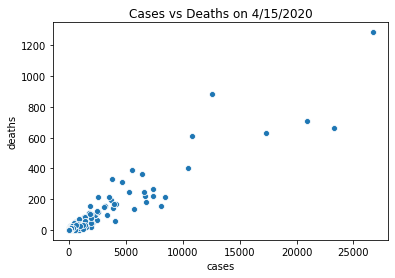

In [16]:
ax = sns.scatterplot(x='cases', y='deaths', data=max_date)
plt.title('Cases vs Deaths on 4/15/2020')

There seems to be a linear relationship between cases and deaths. 

Text(0.5, 1.0, 'Mean Income vs Cases')

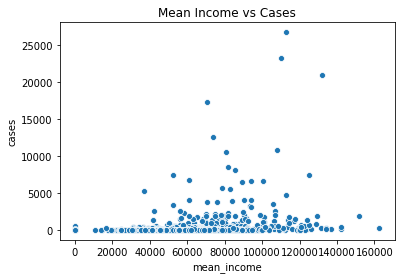

In [17]:
# Mean income by cases graph
ax = sns.scatterplot(x='mean_income', y='cases', data=max_date)
plt.xlabel('mean_income')
plt.title('Mean Income vs Cases')

In [ ]:
There seems to be a bell shaped curve for this where middle class income 

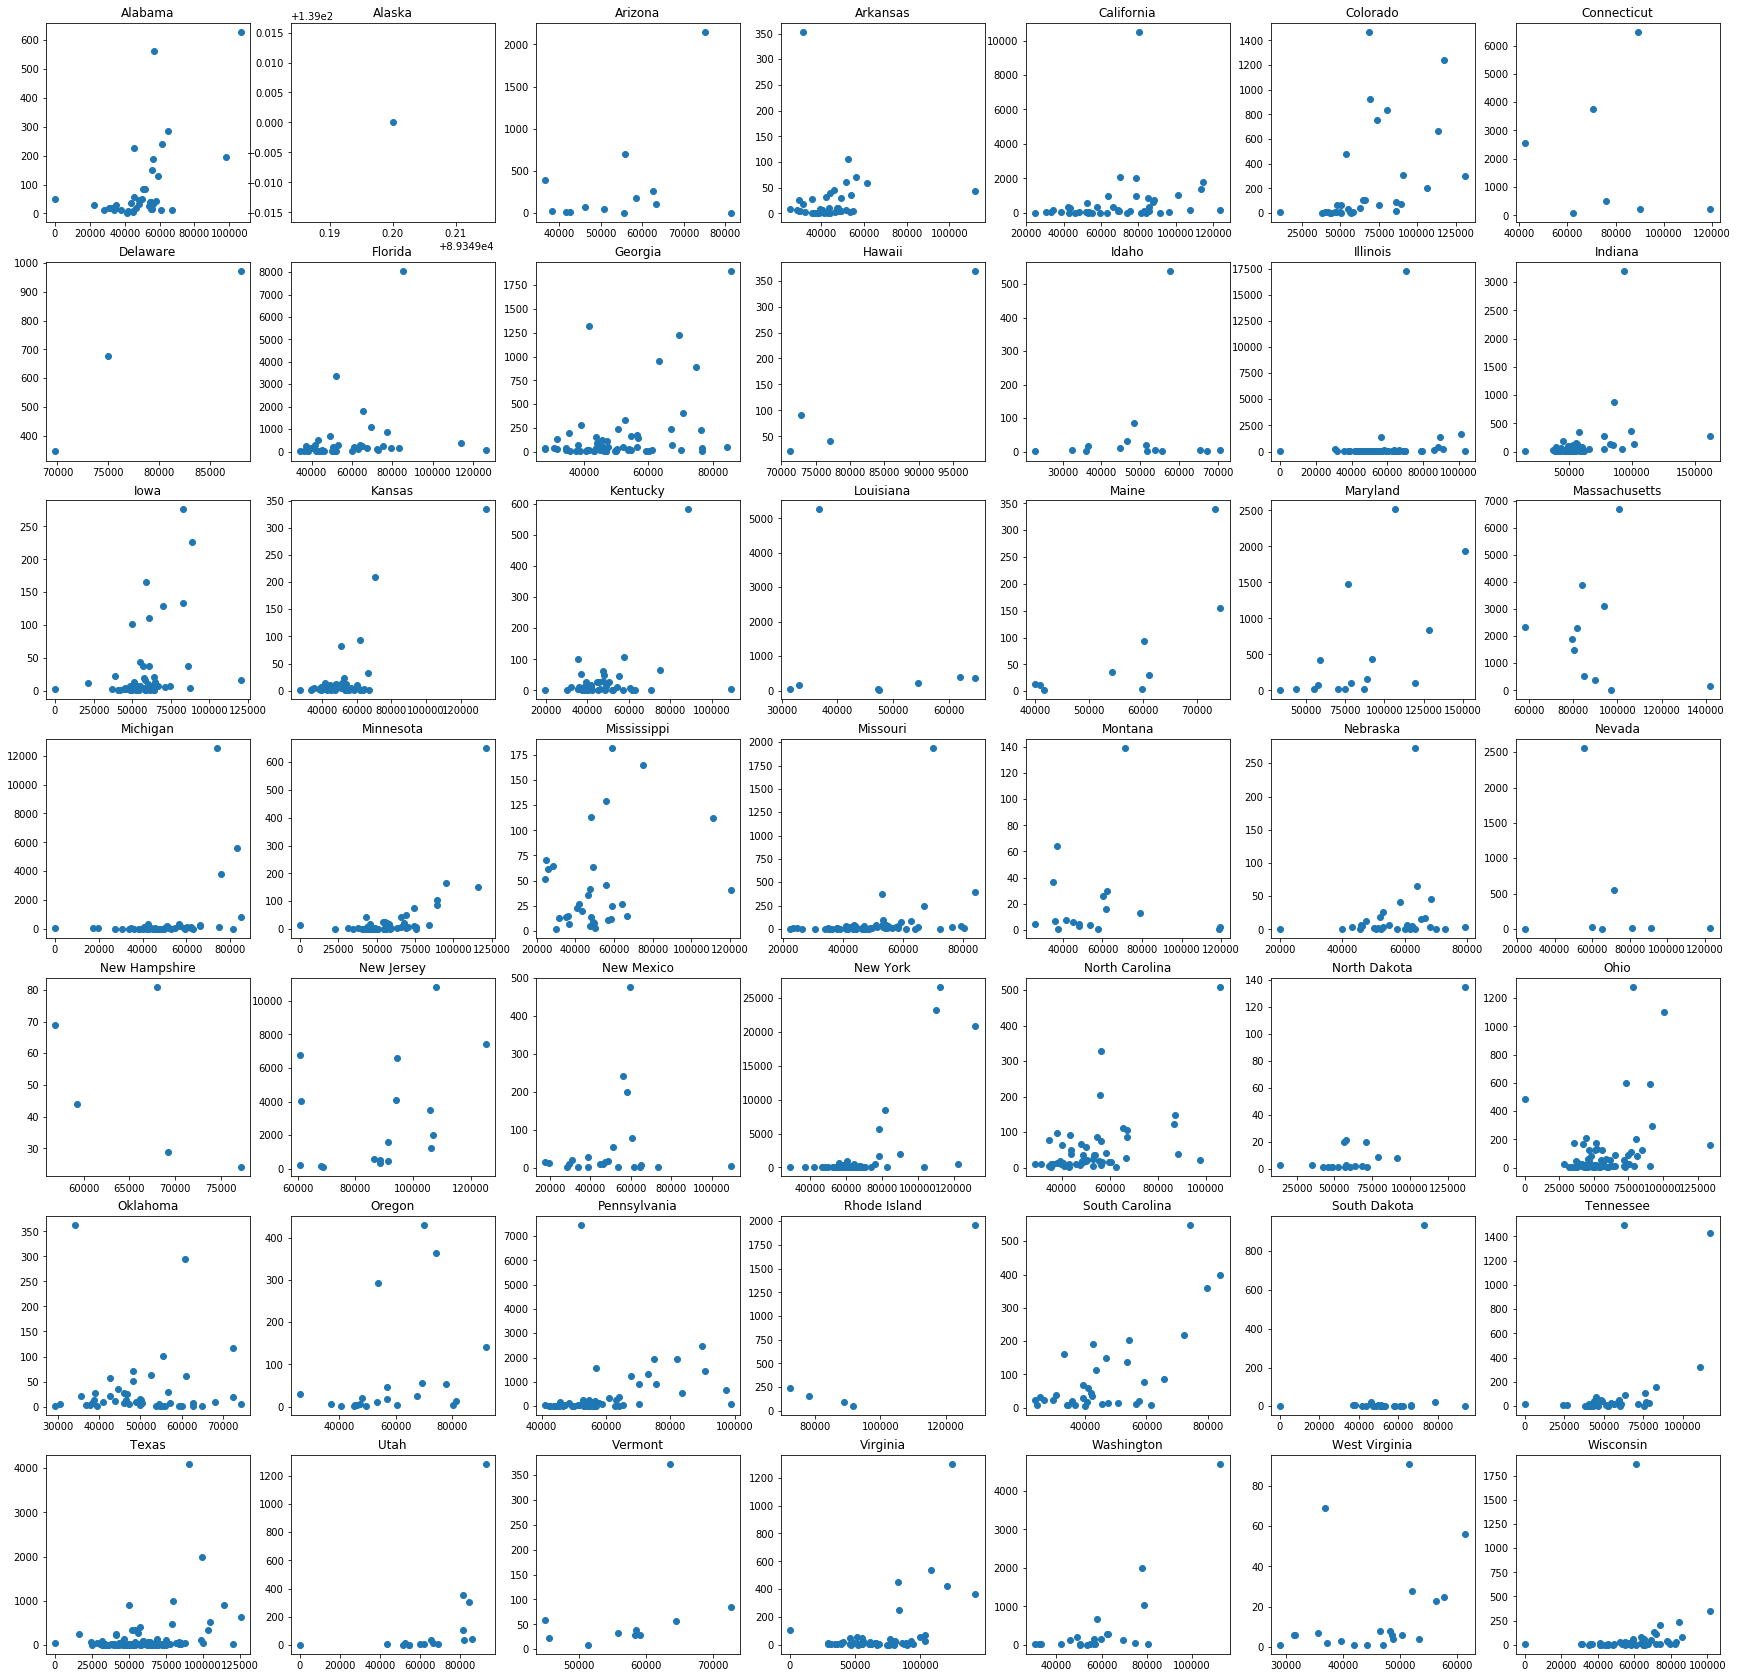

In [18]:
# graph of cases and mean income

fig, axs = plt.subplots(7,7, figsize=(30,30))

count=0

for i in range(0,7):
    for j in range(0,7):
        data = max_date[max_date.state == list(max_date['state'].unique())[count]]
        axs[i,j].scatter(x='mean_income', y='cases', data=data)
        axs[i,j].set_title(list(max_date['state'].unique())[count])
        count+=1

# list(max_date['state'].unique())

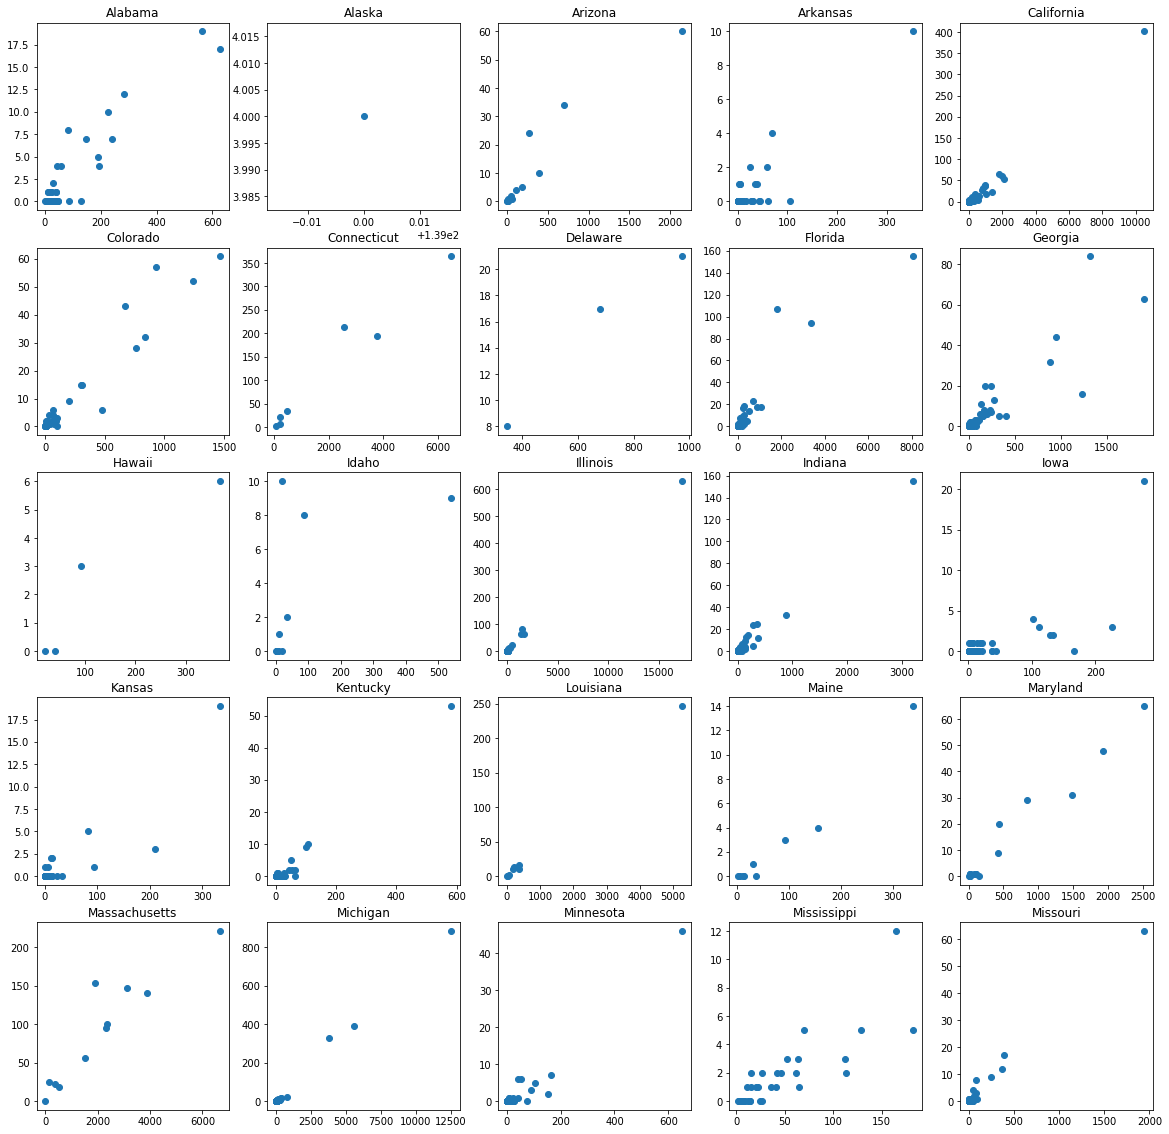

In [19]:
# graph of cases and deaths

fig, axs = plt.subplots(5,5, figsize=(20,20))

count=0
plt.title('Cases vs. Deaths')
for i in range(0,5):
    for j in range(0,5):
        data = max_date[max_date.state == list(max_date['state'].unique())[count]]
        axs[i,j].scatter(x='cases', y='deaths', data=data)
        axs[i,j].set_title(list(max_date['state'].unique())[count])
        count+=1
